# Analysis Report
## Files
setC.csv = data obtained from the blocking stage  
sampleA.csv = 800 rows that are sample with (seed = 10) from setC

In [2]:
import csv

setC = None
with open('labelled_year.csv', 'r') as file:
    setA = list(csv.reader(file))
    setA = setA[1:] # Remove header
    setB = setA[375:] # Evaluation set
    setA = setA[:375] # Development set

class attr:
    label = 0
    _id = 1
    ltable_Id = 2
    rtable_Id = 3
    ltable_Title = 4
    ltable_Category = 5
    ltable_Duration = 6
    ltable_Rating = 7
    ltable_Rating_Count = 8
    ltable_Director = 9 
    ltable_Year = 10
    rtable_Title = 11
    rtable_Category = 12
    rtable_Duration = 13
    rtable_Rating = 14
    rtable_Rating_Count = 15
    rtable_Director = 16
    rtable_Year = 17
#    setC.csv
#     _id = 0
#     ltable_Id = 1
#     rtable_Id = 2
#     ltable_Title = 3
#     ltable_Category = 4
#     ltable_Duration = 5
#     ltable_Rating = 6
#     ltable_Rating_Count = 7
#     ltable_Director = 8
#     rtable_Title = 9
#     rtable_Category = 10
#     rtable_Duration = 11
#     rtable_Rating = 12
#     rtable_Rating_Count =13 
#     rtable_Director = 14
    strings = ['label', '_id', 'ltable_Id', 'rtable_Id', 'ltable_Title', 'ltable_Category', 
               'ltable_Duration', 'ltable_Rating', 'ltable_Rating_Count', 'ltable_Director', 
               'ltable_Year', 'rtable_Title', 'rtable_Category', 'rtable_Duration', 'rtable_Rating',
               'rtable_Rating_Count', 'rtable_Director', 'rtable_Year']
#    check for setC.csv
#     strings = ['_id', 'ltable_Id', 'rtable_Id', 'ltable_Title', 'ltable_Category', 
#                'ltable_Duration', 'ltable_Rating', 'ltable_Rating_Count', 'ltable_Director', 
#                'rtable_Title', 'rtable_Category', 'rtable_Duration', 'rtable_Rating', 'rtable_Rating_Count',
#                'rtable_Director']

In [3]:
# Calculate number of null value for each attributes
def check_null(setx):
    num_null = [0 for i in range(18)]
    
    for row in setx:
        for pos, val in enumerate(row):
            if not val:
                num_null[pos] += 1
    
    for pos, val in enumerate(num_null):
        print(attr.strings[pos] + ": " + str(val))

In [4]:
check_null(setA)

label: 0
_id: 0
ltable_Id: 0
rtable_Id: 0
ltable_Title: 0
ltable_Category: 5
ltable_Duration: 0
ltable_Rating: 40
ltable_Rating_Count: 40
ltable_Director: 113
ltable_Year: 27
rtable_Title: 0
rtable_Category: 18
rtable_Duration: 63
rtable_Rating: 98
rtable_Rating_Count: 0
rtable_Director: 45
rtable_Year: 3


In [5]:
# filereader=csv.reader(open('setC.csv'),delimiter=',')
# next(filereader)
# check_null(filereader)
# results
# _id: 0
# ltable_Id: 0
# rtable_Id: 0
# ltable_Title: 0
# ltable_Category: 273
# ltable_Duration: 0
# ltable_Rating: 1570
# ltable_Rating_Count: 1570
# ltable_Director: 4114
# rtable_Title: 0
# rtable_Category: 566
# rtable_Duration: 2274
# rtable_Rating: 3228
# rtable_Rating_Count: 0
# rtable_Director: 1613

In [6]:
# Define a function that scan the whole table and remove null value based on pos
def fill_null(setx, pos, val):
    for row in setx:
        if not row[pos]:
            row[pos] = val

In [7]:
# Values with null item, size of setA = 800
# print("SetA")
# check_null(setA)
fill_null(setA, attr.ltable_Rating, 0)
fill_null(setA, attr.rtable_Rating, 0)
fill_null(setA, attr.ltable_Duration, 0)
fill_null(setA, attr.rtable_Duration, 0)
fill_null(setA, attr.ltable_Rating_Count, 0)
fill_null(setA, attr.rtable_Rating_Count, 0)
fill_null(setA, attr.ltable_Year, 0)
fill_null(setA, attr.rtable_Year, 0)
# print("SetB")
# check_null(setB)
fill_null(setB, attr.ltable_Rating, 0)
fill_null(setB, attr.rtable_Rating, 0)
fill_null(setB, attr.ltable_Duration, 0)
fill_null(setB, attr.rtable_Duration, 0)
fill_null(setB, attr.ltable_Rating_Count, 0)
fill_null(setB, attr.rtable_Rating_Count, 0)
fill_null(setB, attr.ltable_Year, 0)
fill_null(setB, attr.rtable_Year, 0)

## Begin Matching
Start by converting each labelled row into a feature vector

In [8]:
from sklearn import tree, ensemble, linear_model, svm, naive_bayes
from sklearn.model_selection import KFold
from py_stringmatching.tokenizer.delimiter_tokenizer import DelimiterTokenizer
from py_stringmatching.similarity_measure.levenshtein import Levenshtein
from py_stringmatching.similarity_measure.jaccard import Jaccard
from py_stringmatching.tokenizer.delimiter_tokenizer import DelimiterTokenizer

delim_tkn = DelimiterTokenizer()
lev = Levenshtein()
delim_tok=DelimiterTokenizer(',')
jac=Jaccard()


class_group = ['d', 'l', 'r', 's', 'n','l_svc']
classifiers = {'d':tree.DecisionTreeClassifier(), 'l':linear_model.LogisticRegression(), 'r':ensemble.RandomForestClassifier(), 's':svm.SVC(), 'n':naive_bayes.GaussianNB(),'l_svc':svm.LinearSVC()}
names = {'d':'DECISION TREE', 'l':'LOGISTIC REGRESSION', 'r':'RANDOM FOREST', 's':'SUPPORT VECTOR MACHING', 'n':'NAIVE BAYES', 'l_svc':'LINEAR SUPPORT VECTOR CLASSIFICATION'}

In [9]:
def title_match(x, y):
    return lev.get_raw_score(x, y)

def category_match(x, y):
    return lev.get_raw_score(x, y)
    
def rating_match(x, y):
    return abs(float(x) - float(y))
    
def director_match(x, y):
    return lev.get_raw_score(x, y)

def rating_count_match(x, y):
    return abs(float(x) - float(y))

def duration_match(x, y):
    return abs(float(x) - float(y))

In [10]:
# Given a set, return the feature vectors and label
def get_feature(setx):
    feature = []
    label = []
    
    for row in setx:
        label += [row[attr.label]]
        
        x_0 = title_match(row[attr.ltable_Title], row[attr.rtable_Title])
        x_1 = category_match(row[attr.ltable_Category], row[attr.rtable_Category])
        x_2 = rating_match(row[attr.ltable_Rating], row[attr.rtable_Rating])
        x_3 = director_match(row[attr.ltable_Director], row[attr.rtable_Director])
        x_4 = duration_match(row[attr.ltable_Duration], row[attr.rtable_Duration])
        x_5 = rating_count_match(row[attr.ltable_Rating_Count], row[attr.rtable_Rating_Count])
        
         #feature=[[1,3,6],[2,9,7]]
        feature += [[x_0, x_1, x_2, x_3]]
        
    return feature, label
    

In [11]:
def get_ltable(setx):
     #row[3:5] will return a list. ["hi","z","ok"]
    return [[row[attr.ltable_Id]] + row[attr.ltable_Title:attr.ltable_Year + 1]for row in setx]

def get_rtable(setx):
    return [[row[attr.rtable_Id]] + row[attr.rtable_Title:]for row in setx]

def get_label(setx):
    return [row[attr.label] for row in setx]

In [12]:
# Given a list of real result and predicted result, calculate precision, recall and F1
def get_F1(real, predicted):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for pos,res in enumerate(predicted):
        if res == real[pos]:
            if res == '1':
                true_positive += 1
            else:
                true_negative += 1
        else:
            if res == '1':
                false_positive += 1
            else:
                false_negative += 1
    
    # If true_positive, false_positive or false_negative causes zero error: set precision, recall and F1 to zero
    try:
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        F1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        return 0,0,0
    
    return precision, recall, F1

In [13]:
def debug_x(ltable, rtable, label, predicted):
    #label is golden data
    for pos,res in enumerate(predicted):
        #print the tuple of the left and right table that does not match with golden
        if res != label[pos]:
            print("ltable: " + str(ltable[pos]))
            print("rtable: " + str(rtable[pos]))
            print("Label: " + str(label[pos]) + " Predicted: " + str(res))

In [14]:
# Test setx using the classifier = clf
#verbose prints precision, recall, f1
def clf_test(setx, clf, test_name='TEST', verbose=False, get_feature=get_feature, debug=False):
    feature, label = get_feature(setx)
    result = clf.predict(feature)               #classifier's built in function
    precision, recall, F1 = get_F1(label, result)
    
    if debug:
        debug_x(get_ltable(setx), get_rtable(setx), label, result)
    
    if verbose:
        print()
        print(test_name.upper())
        print("Precision: " + str(precision))
        print("Recall: " + str(recall))
        print("F1: " + str(F1))
    
    return precision, recall, F1

In [15]:
# Train and test on setx using the classifier = clf and k-fold validation = k
# Return the average (precision, recall, F1)
# clf : 'd' = DecisionTree, 'l' = Logistic Regression, 'r' = Random Forest, 's' = Support Vector Machine, 'n' = Naive Bayes
def clf_train(setx, clf, k, verbose=False, get_feature=get_feature, debug=False):
    if not clf in class_group:
        print("ERROR: clf must be either = 'd', 'l', 'r', 's', 'n', 'l_svc'")
        return
        
    # Decision Tree Classifier using k-Fold = 4
    split = 4
    k_fold = KFold(n_splits=split)
    total_precision = 0
    total_recall = 0
    total_F1 = 0
    
    #fold 1, fold 2, fold 3, fold 4
    for train, test in k_fold.split(setx):
         #what is this????????
        train = setx[train[0]:train[-1] + 1]
        test = setx[test[0]:test[-1] + 1]
        feature, label = get_feature(train)
        
        clf_x = classifiers[clf]        
        clf_x = clf_x.fit(feature, label)
        
        precision, recall, F1 = clf_test(test, clf_x, get_feature=get_feature, debug=debug)

        total_precision += precision
        total_recall += recall
        total_F1 += F1
        
    precision = total_precision/split
    recall = total_recall/split
    F1 = total_F1/split
    if verbose:
        print()
        print(names[clf] + " CLASSIFIER")
        print("Precision: " + str(precision))
        print("Recall: " + str(recall))
        print("F1: " + str(F1))
    
    return precision, recall, F1

### Iteration 1 (Cross Validation)  

* Use get_feature, instead of get_feature2  
* Suppress duration and rating_count  
* There's no year attributes in our setC.csv yet


In [16]:
# Decision Tree Classifier using k-Fold = 4
precision, recall, F1 = clf_train(setA, 'd', 4, verbose=True, get_feature=get_feature)


DECISION TREE CLASSIFIER
Precision: 0.9479729729729729
Recall: 0.9857142857142858
F1: 0.9660087719298247


In [17]:
# Logistic Regression Classifier using k-Fold = 4
precision, recall, F1 = clf_train(setA, 'l', 4, verbose=True, get_feature=get_feature)


LOGISTIC REGRESSION CLASSIFIER
Precision: 0.9313452060931899
Recall: 0.932016806722689
F1: 0.929723850383709


In [18]:
# Random Forest Classifier using k-Fold = 4
precision, recall, F1 = clf_train(setA, 'r', 4, verbose=True, get_feature=get_feature)


RANDOM FOREST CLASSIFIER
Precision: 0.9827586206896551
Recall: 0.9714285714285714
F1: 0.9759199134199135


In [19]:
# Support Vector Machine Classifier using k-Fold = 4
precision, recall, F1 = clf_train(setA, 's', 4, verbose=True, get_feature=get_feature)


SUPPORT VECTOR MACHING CLASSIFIER
Precision: 1.0
Recall: 0.8216931216931217
F1: 0.8914576802507836


In [20]:
# Naive Bayes Classifier using k-Fold = 4
precision, recall, F1 = clf_train(setA, 'n', 4, verbose=True, get_feature=get_feature)


NAIVE BAYES CLASSIFIER
Precision: 0.9232638888888889
Recall: 0.9175210084033614
F1: 0.918054433047314


## Debug Classifier
Most classfiers return an F1-Score of 0.9 and above, the accuracy is consider high. When tested on the isolated evaluation set, the F1-Score is around 0.9 too. But, we will try to make the classifier even better.  

Some things that we plan to look into are:  
1) Conversion of data into feature vectors  
2) Classifier that is used, we might be able to tweak the scikit classifier

In [21]:
#Debugging
#Split development set into 2, namely i and j. Train on i, test on j
def clf_train2(setx, clf, k, verbose=False, get_feature=get_feature, debug=False):
    if not clf in class_group:
        print("ERROR: clf must be either = 'd', 'l', 'r', 's', 'n','l_svc'")
        return
        
    # Decision Tree Classifier using k-Fold = 4
#     split = 2 #ADDED by fzy
#     k_fold = KFold(n_splits=split)
    total_precision = 0
    total_recall = 0
    total_F1 = 0
    half = int(len(setx)/2)
    train = setx[:half]
    test = setx[half:]
    
    #fold 1, fold 2, fold 3, fold 4
#     for train, test in k_fold.split(setx):
        #what is this????????
#         train = setx[train[0]:train[-1] + 1]  #change this
#         test = setx[test[0]:test[-1] + 1]     #change this
#         break
        
    feature, label = get_feature(train)
#     clf_x = None

#     if clf == 'd':
#         clf_x = tree.DecisionTreeClassifier()
#     elif clf == 'l':
#         clf_x = linear_model.LogisticRegression()
#     elif clf == 'r':
#         clf_x = ensemble.RandomForestClassifier()
#     elif clf == 's':
#         clf_x = svm.SVC()
#     elif clf == 'n':
#         clf_x = naive_bayes.GaussianNB()
    
    clf_x = classifiers[clf] 
    #pass in feature and label to the classifer
    #warm start default to false
    clf_x = clf_x.fit(feature, label)
    #clf_x is an classifier that we have trained on training set
    precision, recall, F1 = clf_test(test, clf_x, get_feature=get_feature, debug=debug)

#     total_precision += precision
#     total_recall += recall
#     total_F1 += F1
        
#     precision = total_precision/split
#     recall = total_recall/split
#     F1 = total_F1/split
    if verbose:
        print()
        print(names[clf] + " CLASSIFIER")
        print("Precision: " + str(precision))
        print("Recall: " + str(recall))
        print("F1: " + str(F1))
    
    return precision, recall, F1

### Iteration 2 (Debugging)
* Use get_feature, instead of get_feature2  
* Suppress duration and rating_count  
* There's no year attributes in our setC.csv yet

In [22]:
precision, recall, F1 = clf_train2(setA, 'd', 2, verbose=True, get_feature=get_feature, debug=False)
precision, recall, F1 = clf_train2(setA, 'l', 2, verbose=True, get_feature=get_feature, debug=False)
precision, recall, F1 = clf_train2(setA, 'r', 2, verbose=True, get_feature=get_feature, debug=False)
precision, recall, F1 = clf_train2(setA, 's', 2, verbose=True, get_feature=get_feature, debug=False)
precision, recall, F1 = clf_train2(setA, 'n', 2, verbose=True, get_feature=get_feature, debug=False)


DECISION TREE CLASSIFIER
Precision: 0.8955223880597015
Recall: 0.9836065573770492
F1: 0.9375

LOGISTIC REGRESSION CLASSIFIER
Precision: 0.9344262295081968
Recall: 0.9344262295081968
F1: 0.9344262295081968

RANDOM FOREST CLASSIFIER
Precision: 0.9672131147540983
Recall: 0.9672131147540983
F1: 0.9672131147540983

SUPPORT VECTOR MACHING CLASSIFIER
Precision: 1.0
Recall: 0.6065573770491803
F1: 0.7551020408163265

NAIVE BAYES CLASSIFIER
Precision: 0.8769230769230769
Recall: 0.9344262295081968
F1: 0.9047619047619049


In [23]:
import matplotlib.pyplot as plot
from numpy import linspace as lins
import math

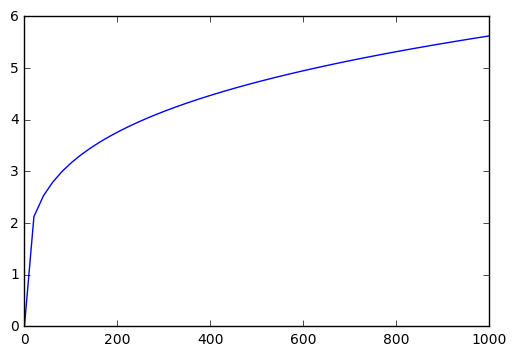

In [24]:
x = lins(0,1000)
y = list(map(lambda x:math.sqrt(math.sqrt(x)), x))
plot.plot(x,y)
plot.show()

### Changes Made

* Inserted attribute "Year" into setC.csv  
* Changed our feature for title  
* Changed our feature for category  
* Changed our feature for rating (Use squareroot)  
* Changed our feature for director  
* Changed our feature for rating_count (Although we suppress this feature and never use it since beginning)  
* Changed our feature for duration  
* Changed our feature for year  

In [25]:
#Recall that delim_tkn=DelimeterTokenizer()
#Recall that delim_tok=DelimeterTokenizer(",")
from math import exp


def title_match2(x, y):
    return lev.get_sim_score(x.lower(), y.lower())
    
def title_match3(x,y):                   #NEW
    x=x.lower()
    y=y.lower()
    j=delim_tkn.tokenize(x)
    k=delim_tkn.tokenize(y)
    results=jac.get_raw_score(j,k)
    return results

##################################################
def category_match2(x, y):
    cat_x = x.split(',')
    cat_y = y.split(',')
    
    count = 0
    for i in cat_x:
        for j in cat_y:
            if i == j:
                count += 1
                return 1
    return 0

def category_match3(x,y):                      #NEW
    x=x.lower()
    y=y.lower()
    if "news" in x and "news" not in y:
        return -1
    else:
        j=delim_tok.tokenize(x)
        k=delim_tok.tokenize(y)
        results=jac.get_raw_score(j,k)
        return results

###############################################################    
def rating_match2(x, y):
    return math.sqrt(abs(float(x) - float(y)))
######################################################################   
def director_match2(x, y):
    dir_x = x.split(',')
    dir_y = x.split(',')
    
    count = 0
    for i in dir_x:
        for j in dir_y:
            ii = i.strip().lower()
            jj = j.strip().lower()
            if ii and jj:
                if lev.get_sim_score(ii,jj) > 0.9:
                    count += 1
                    return 1
    return 0

def director_match3(x,y):              #NEW                                         
    x=x.lower()
    y=y.lower()
    j=delim_tok.tokenize(x)
    k=delim_tok.tokenize(y)
    results=jac.get_raw_score(j,k)
    return results
#############################################################################
def rating_count_match2(x, y):
    return math.sqrt(math.sqrt(abs(float(x) - float(y))))
###################################################################
def duration_match2(x, y):
    if x == y:
        return 1
    return 0
#       return math.sqrt(math.sqrt(abs(float(x) - float(y))))

################################################################################
def year_match2(x,y):
    if x == y:                                                  #USE THIS
        return 1
    return 0

    
def year_match3(x, y):                        #NEW
    return math.sqrt(math.sqrt(abs(int(x)-int(y))))             #DON'T USE THIS


In [26]:
# Given a set, return the feature vectors and label
def get_feature2(setx):
    feature = []
    label = []
    for row in setx:
        label += [row[attr.label]]
        
        x_0 = title_match3(row[attr.ltable_Title], row[attr.rtable_Title])
        x_1 = category_match3(row[attr.ltable_Category], row[attr.rtable_Category])
        x_2 = rating_match2(row[attr.ltable_Rating], row[attr.rtable_Rating])     
        x_3 = director_match3(row[attr.ltable_Director], row[attr.rtable_Director])
        x_4 = duration_match2(row[attr.ltable_Duration], row[attr.rtable_Duration])
        x_5 = rating_count_match2(row[attr.ltable_Rating_Count], row[attr.rtable_Rating_Count])   #Suppress
        x_6 = year_match2(row[attr.ltable_Year], row[attr.rtable_Year])
        
        #feature += [[x_0, x_1, x_2, x_3, x_4, x_6]]  #suppress rating count
        feature += [[x_0, x_1, x_3, x_4, x_6]]        #suppress rating and rating count
        
    return feature, label
    

### Iteration 3 (Cross Validation)
* Now setC.csv has year attribute in it
* Suppress rating_count
* Use title_match2
* Use category_match2
* Use rating_match2
* Use director_match2
* Use duration_match2
* Use year_match2

In [27]:
# Debug Classifiers using k-Fold = 4

#Suppress rating_count
#Use title_match2,category_match2,rating_match2, director_match2,duration_match2, year_match2
precision, recall, F1 = clf_train(setA, 'd', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'l', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'r', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 's', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'n', 4, verbose=True, get_feature=get_feature2, debug=False)


DECISION TREE CLASSIFIER
Precision: 0.968013468013468
Recall: 0.955026455026455
F1: 0.9613289760348583

LOGISTIC REGRESSION CLASSIFIER
Precision: 0.9832417582417583
Recall: 0.9596327419856832
F1: 0.971130441885159

RANDOM FOREST CLASSIFIER
Precision: 0.9764550264550265
Recall: 0.9617491441020853
F1: 0.9688792688792689

SUPPORT VECTOR MACHING CLASSIFIER
Precision: 0.9820512820512821
Recall: 0.9239184562713975
F1: 0.9513502221049391

NAIVE BAYES CLASSIFIER
Precision: 0.9655830280830281
Recall: 0.9833877995642701
F1: 0.9742092055351772


### Iteration 4 (Debugging)
* Suppress rating_count
* Use title_match2
* Use category_match2
* Use rating_match2
* Use director_match2
* Use duration_match2
* Use year_match2

In [28]:
precision, recall, F1 = clf_train2(setA, 'd', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'l', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'r', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 's', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'n', 2, verbose=True, get_feature=get_feature2, debug=False)


DECISION TREE CLASSIFIER
Precision: 0.9166666666666666
Recall: 0.9016393442622951
F1: 0.9090909090909091

LOGISTIC REGRESSION CLASSIFIER
Precision: 0.9666666666666667
Recall: 0.9508196721311475
F1: 0.9586776859504132

RANDOM FOREST CLASSIFIER
Precision: 0.9032258064516129
Recall: 0.9180327868852459
F1: 0.9105691056910569

SUPPORT VECTOR MACHING CLASSIFIER
Precision: 0.9827586206896551
Recall: 0.9344262295081968
F1: 0.9579831932773109

NAIVE BAYES CLASSIFIER
Precision: 0.9384615384615385
Recall: 1.0
F1: 0.9682539682539683


### Changes Made
* Suppress rating and rating_count
* Use title_match3
* Use category_match3
* Use director_match3
* Use duration_match2
* Use year_match2
* Introduced new learning algorithm called Linear Support Vector Classification

### Iteration 5 (Cross Validation) 
* Suppress rating and rating_count
* **Use title_match3**
* **Use category_match3**
* **Use director_match3**
* Use duration_match2
* Use year_match2
* Introduced new learning algorithm called Linear Support Vector Classification

In [29]:
#Suppress rating_count and rating

precision, recall, F1 = clf_train(setA, 'd', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'l', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'r', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 's', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'n', 4, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train(setA, 'l_svc', 4, verbose=True, get_feature=get_feature2, debug=False)


DECISION TREE CLASSIFIER
Precision: 0.9751157407407407
Recall: 0.955026455026455
F1: 0.964621337755666

LOGISTIC REGRESSION CLASSIFIER
Precision: 0.9832417582417583
Recall: 0.9596327419856832
F1: 0.971130441885159

RANDOM FOREST CLASSIFIER
Precision: 0.9835978835978836
Recall: 0.9835978835978836
F1: 0.9835978835978836

SUPPORT VECTOR MACHING CLASSIFIER
Precision: 0.9820512820512821
Recall: 0.9239184562713975
F1: 0.9513502221049391

NAIVE BAYES CLASSIFIER
Precision: 0.9655830280830281
Recall: 0.9833877995642701
F1: 0.9742092055351772

LINEAR SUPPORT VECTOR CLASSIFICATION CLASSIFIER
Precision: 0.9835978835978836
Recall: 0.9688920012449425
F1: 0.976022126022126


### Iteration 6 (Debugging)
* Suppress rating and rating_count
* **Use title_match3**
* **Use category_match3**
* **Use director_match3**
* Use duration_match2
* Use year_match2
* Introduced new learning algorithm called Linear Support Vector Classification

In [30]:
precision, recall, F1 = clf_train2(setA, 'd', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'l', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'r', 2, verbose=True, get_feature=get_feature2, debug=True)
precision, recall, F1 = clf_train2(setA, 's', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'n', 2, verbose=True, get_feature=get_feature2, debug=False)
precision, recall, F1 = clf_train2(setA, 'l_svc', 2, verbose=True, get_feature=get_feature2, debug=True)


DECISION TREE CLASSIFIER
Precision: 0.9166666666666666
Recall: 0.9016393442622951
F1: 0.9090909090909091

LOGISTIC REGRESSION CLASSIFIER
Precision: 0.9666666666666667
Recall: 0.9508196721311475
F1: 0.9586776859504132
ltable: ['7633', 'Grudge Match', 'Comedy,Sport', '113', '64', '47183', 'Peter Segal', '2013']
rtable: ['8541', 'Grudge Match', 'Comedy,Drama,Sports,Fitness', '113', '64', '35912', 'Peter Segal,', '2013']
Label: 1 Predicted: 0
ltable: ['19076', 'Phantom of the Paradise', 'Comedy,Drama,Fantasy', '92', '74', '11358', 'Brian De Palma', '1974']
rtable: ['16198', 'Phantom of the Paradise', 'Classics,Comedy,Cult Movies,Horror,Musical,Performing Arts', '91', '78', '9911', 'Brian DePalma,', '1974']
Label: 1 Predicted: 0
ltable: ['13888', 'Starman', 'Romance,Sci-Fi', '115', '70', '33597', 'John Carpenter', '1984']
rtable: ['8208', 'Starman', 'Drama,Science Fiction,Fantasy,Romance', '115', '66', '24445', 'John Carpenter,', '1984']
Label: 1 Predicted: 0
ltable: ['16136', 'Katy Perry:

### Changes Made
**No Changes Made**

In [31]:
# # Debug on only random forest
# clf = svm.LinearSVC()
# train,test = setA[:225], setA[225:]
# feature, label = get_feature2(train)
# clf.fit(feature, label)
# print("Linear Support Vector Classification weights")
# # Result shows that weights are mostly place on "Title", "Director", "Rating", "Duration"
# # "Title" "Category" "Rating" "Director" "Duration" "Rating Count"
# #print(path_x)
# precision, recall, F1 = clf_test(test, clf, "Linear Support Vector Test", get_feature=get_feature2, verbose=True, debug=True)

## Computing the accuracy of the best matcher: Linear Support Vector Classification
We train the matcher on the development set and test it on the evaluation set that we haven't use until now.

In [32]:
# Final Classifier
clf = svm.LinearSVC() 
feature, label = get_feature2(setA)
clf = clf.fit(feature, label)
precision, recall, F1 = clf_test(setB, clf, "Final Classifier Evaluation(Linear Support Vector Classification)", get_feature=get_feature2, verbose=True, debug=True)


FINAL CLASSIFIER EVALUATION(LINEAR SUPPORT VECTOR CLASSIFICATION)
Precision: 1.0
Recall: 1.0
F1: 1.0


Train all other matchers on the development set and test it on the evaluation set.

In [33]:
#Decision Tree
clf =tree.DecisionTreeClassifier()
feature, label = get_feature2(setA)
clf = clf.fit(feature, label)
precision, recall, F1 = clf_test(setB, clf, "Classifier Evaluation(Decision Tree)", get_feature=get_feature2, verbose=True, debug=True)

ltable: ['7575', 'Ice Age: Continental Drift', 'News', '30', 0, 0, '', '2012']
rtable: ['1181', 'Ice Age: Continental Drift', 'Action,Adventure,Animation,Comedy,Kids,Family', '87', '72', '150866', 'Michael Thurmeier,Steve Martino,', '2012']
Label: 0 Predicted: 1
ltable: ['3497', 'How to Train Your Dragon 2', 'Animation,Action,Adventure', '102', '79', '225231', 'Dean DeBlois', '2014']
rtable: ['2917', 'How to Train Your Dragon', 'Animation,Kids,Family,Science Fiction,Fantasy', '98', '84', '310257', 'Dean DeBlois,Chris Sanders,', '2010']
Label: 0 Predicted: 1
ltable: ['8693', 'The Game Plan', 'Comedy,Drama', '45', 0, 0, '', '2016']
rtable: ['1120', 'The Game Plan', 'Comedy', '110', '70', '406721', 'Andy Fickman,', '2007']
Label: 0 Predicted: 1

CLASSIFIER EVALUATION(DECISION TREE)
Precision: 0.9117647058823529
Recall: 1.0
F1: 0.9538461538461539


In [34]:
#Logistic Regression
clf=linear_model.LogisticRegression()
feature, label = get_feature2(setA)
clf = clf.fit(feature, label)
precision, recall, F1 = clf_test(setB, clf, "Classifier Evaluation(Logistic Regression Classifier)", get_feature=get_feature2, verbose=True, debug=True)


CLASSIFIER EVALUATION(LOGISTIC REGRESSION CLASSIFIER)
Precision: 1.0
Recall: 1.0
F1: 1.0


In [35]:
#Random Forest

clf=ensemble.RandomForestClassifier()
feature, label = get_feature2(setA)
clf = clf.fit(feature, label)
precision, recall, F1 = clf_test(setB, clf, "Classifier Evaluation(Random Forest Classifier)", get_feature=get_feature2, verbose=True, debug=True)

ltable: ['7575', 'Ice Age: Continental Drift', 'News', '30', 0, 0, '', '2012']
rtable: ['1181', 'Ice Age: Continental Drift', 'Action,Adventure,Animation,Comedy,Kids,Family', '87', '72', '150866', 'Michael Thurmeier,Steve Martino,', '2012']
Label: 0 Predicted: 1
ltable: ['8693', 'The Game Plan', 'Comedy,Drama', '45', 0, 0, '', '2016']
rtable: ['1120', 'The Game Plan', 'Comedy', '110', '70', '406721', 'Andy Fickman,', '2007']
Label: 0 Predicted: 1

CLASSIFIER EVALUATION(RANDOM FOREST CLASSIFIER)
Precision: 0.9393939393939394
Recall: 1.0
F1: 0.96875


In [36]:
#Support Vector Machine
clf=svm.SVC()
feature, label = get_feature2(setA)
clf = clf.fit(feature, label)
precision, recall, F1 = clf_test(setB, clf, "Classifier Evaluation(Support Vector Machine Classifier)", get_feature=get_feature2, verbose=True, debug=True)


CLASSIFIER EVALUATION(SUPPORT VECTOR MACHINE CLASSIFIER)
Precision: 1.0
Recall: 1.0
F1: 1.0


In [37]:
#Naive Bayes
clf=naive_bayes.GaussianNB()
feature, label = get_feature2(setA)
clf = clf.fit(feature, label)
precision, recall, F1 = clf_test(setB, clf, "Classifier Evaluation(Naive Bayes Classifier)", get_feature=get_feature2, verbose=True, debug=True)

ltable: ['7575', 'Ice Age: Continental Drift', 'News', '30', 0, 0, '', '2012']
rtable: ['1181', 'Ice Age: Continental Drift', 'Action,Adventure,Animation,Comedy,Kids,Family', '87', '72', '150866', 'Michael Thurmeier,Steve Martino,', '2012']
Label: 0 Predicted: 1

CLASSIFIER EVALUATION(NAIVE BAYES CLASSIFIER)
Precision: 0.96875
Recall: 1.0
F1: 0.9841269841269841


## Train on all golden data and match on all the data

In [50]:
setC=None
goldenData=None
with open('setC_year.csv','r')as file:    #all data that we get after blocking
    setC=list(csv.reader(file))
with open('labelled_year.csv','r')as file:   #labelled data
    goldenData=list(csv.reader(file))
    goldenData=goldenData[1:]   #remove header

In [51]:
#FILL IN NULL VALUES for golden Data
fill_null(goldenData, attr.ltable_Rating, 0)
fill_null(goldenData, attr.rtable_Rating, 0)
fill_null(goldenData, attr.ltable_Duration, 0)
fill_null(goldenData, attr.rtable_Duration, 0)
fill_null(goldenData, attr.ltable_Rating_Count, 0)
fill_null(goldenData, attr.rtable_Rating_Count, 0)
fill_null(goldenData, attr.ltable_Year, 0)
fill_null(goldenData, attr.rtable_Year, 0)
####################
#FILL IN NULL VALUES for setC
fill_null(setC, attr.ltable_Rating-1, 0)
fill_null(setC, attr.rtable_Rating-1, 0)
fill_null(setC, attr.ltable_Duration-1, 0)
fill_null(setC, attr.rtable_Duration-1, 0)
fill_null(setC, attr.ltable_Rating_Count-1, 0)
fill_null(setC, attr.rtable_Rating_Count-1, 0)
fill_null(setC, attr.ltable_Year-1, 0)
fill_null(setC, attr.rtable_Year-1, 0)

In [52]:
#features for setC.csv (WITHOUT LABEL!!!)
def get_feature3(setx):
    feature = []
    for row in setx:
        
        
        x_0 = title_match3(row[attr.ltable_Title-1], row[attr.rtable_Title-1])
        x_1 = category_match3(row[attr.ltable_Category-1], row[attr.rtable_Category-1])
        x_2 = rating_match2(row[attr.ltable_Rating-1], row[attr.rtable_Rating-1])     
        x_3 = director_match3(row[attr.ltable_Director-1], row[attr.rtable_Director-1])
        x_4 = duration_match2(row[attr.ltable_Duration-1], row[attr.rtable_Duration-1])
        x_5 = rating_count_match2(row[attr.ltable_Rating_Count-1], row[attr.rtable_Rating_Count-1])   #Suppress
        x_6 = year_match2(row[attr.ltable_Year-1], row[attr.rtable_Year-1])
        
        #feature += [[x_0, x_1, x_2, x_3, x_4, x_6]]  #suppress rating count
        feature += [[x_0, x_1, x_3, x_4, x_6]]        #suppress rating and rating count
        
    return feature

In [62]:
matched_csv_attributes=['id','ltable_id','rtable_id','ltable_title','ltable_category','ltable_duration','ltable_rating','ltable_ratingCount','ltable_director','ltable_year','rtable_title','rtable_category','rtable_duration','rtable_rating','rtable_ratingCount','rtable_director','rtable_year']
with open('matched.csv','w',newline='')as csvfile:
    csv_writer=csv.writer(csvfile)
    csv_writer.writerow(matched_csv_attributes)
clf = svm.LinearSVC() 
feature1, label = get_feature2(goldenData)   #Recall that golden data has labels
clf = clf.fit(feature1, label)
feature2=get_feature3(setC)
results=clf.predict(feature2)
for pos, res in enumerate(results):
    if res=='1':
        with open('matched.csv','a',newline='')as csvfile:
            csv_writer=csv.writer(csvfile)
            csv_writer.writerow(setC[pos])